# An Economic Analysis of Online Purchase Decisions: Behavioral Evidence from E-Commerce Data
---

## 1- Upload the data

In [1]:
#! pip install ucimlrepo

In [2]:
# Imports

from ucimlrepo import fetch_ucirepo
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# fetch dataset 
online_shoppers_purchasing_intention_dataset = fetch_ucirepo(id=468) 
  
# data (as pandas dataframes) 
X = online_shoppers_purchasing_intention_dataset.data.features 
y = online_shoppers_purchasing_intention_dataset.data.targets 
  
# metadata 
print(online_shoppers_purchasing_intention_dataset.metadata) 
  
# variable information 
print(online_shoppers_purchasing_intention_dataset.variables) 


{'uci_id': 468, 'name': 'Online Shoppers Purchasing Intention Dataset', 'repository_url': 'https://archive.ics.uci.edu/dataset/468/online+shoppers+purchasing+intention+dataset', 'data_url': 'https://archive.ics.uci.edu/static/public/468/data.csv', 'abstract': 'Of the 12,330 sessions in the dataset,\n84.5% (10,422) were negative class samples that did not\nend with shopping, and the rest (1908) were positive class\nsamples ending with shopping.', 'area': 'Business', 'tasks': ['Classification', 'Clustering'], 'characteristics': ['Multivariate'], 'num_instances': 12330, 'num_features': 17, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['Revenue'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2018, 'last_updated': 'Thu Jan 11 2024', 'dataset_doi': '10.24432/C5F88Q', 'creators': ['C. Sakar', 'Yomi Kastro'], 'intro_paper': {'ID': 367, 'type': 'NATIVE', 'title': 'Real-time prediction of online shoppers’ pur

In [4]:
X.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True


In [5]:
X["ProductRelated_Duration"].unique()

array([  0.        ,  64.        ,   2.66666667, ..., 465.75      ,
       184.25      , 346.        ])

In [6]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [7]:
y.head()

,Revenue
0,False
1,False
2,False
3,False
4,False


In [8]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Revenue  12330 non-null  bool 
dtypes: bool(1)
memory usage: 12.2 KB


***PagesValue = [Ecommerce Revenue + Total Goal]/Value Number of Unique Page Views of a Specific Page***


https://support.google.com/analytics/answer/2695658?hl=fr

## 2- Descriptive Statistics

In [9]:
num_columns = ["Administrative", "Administrative_Duration", "Informational", "Informational_Duration", 
               "ProductRelated", "ProductRelated_Duration", "BounceRates", "ExitRates", "PageValues", "SpecialDay"]
len(num_columns)

10

In [10]:
X[num_columns].describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000


***A. Pages administratives & informationnelles:***
- Médiane = 1 (Administrative), 0 (Informational)

- 75 % des sessions ont 0 page informationnelle
  
- Moyenne > médiane → quelques sessions très actives

La majorité des visiteurs ne consulte pas ou très peu les pages administratives ou informatives, tandis qu’une minorité engage une recherche plus approfondie, probablement à un stade avancé du processus d’achat.


***B. Pages produits(ProductRelated / ProductRelated_Duration):***
- Médiane = 18 pages et ≈ 600 secondes

- Moyenne beaucoup plus élevée

- Max extrêmement élevés (705 pages, ~64 000 sec)

L’exploration des pages produits constitue le cœur du processus d’achat. Une majorité de visiteurs manifeste un engagement modéré, tandis qu’une fraction restreinte présente un engagement très intense, susceptible de conduire à une transaction.

***C. BounceRates & ExitRates:***

- Médianes très faibles (≈ 0.003 – 0.025)

- Moyennes supérieures

- Max = 0.20
  
la plupart des sessions ont des taux faibles

mais certaines pages génèrent beaucoup d’abandons

***D. PageValues:***

- Médiane = 0

- Moyenne ≈ 5.9

- Max ≈ 362

la plupart des pages n’ont aucune valeur de conversion

une minorité concentre l’essentiel de la valeur

On remarque que la conversion est très concentrée sur un  sous ensembles de pages et sections.


***E. SpecialDay:***

- Médiane = 0

- Moyenne faible

- Max = 1

La plupart des sessions ont lieu en dehors d'événements commerciaux spécifiques, bien que la proximité de journées particulières puisse augmenter la probabilité d'achat pour un nombre limité de visites.

***Wrap up***

Les statistiques descriptives révèlent une grande hétérogénéité dans le comportement de navigation en ligne. Pour la plupart des variables numériques, de grandes différences entre les moyennes et les médianes indiquent une forte asymétrie à droite. La majorité des sessions impliquent une interaction limitée avec les pages administratives et informatives, tandis que l'activité liée aux produits montre un engagement nettement plus élevé. Le temps passé et les valeurs des pages sont fortement concentrés parmi une petite fraction des utilisateurs, ce qui suggère que les décisions d'achat sont guidées par un comportement de navigation intensif plutôt que par l'activité moyenne des utilisateurs.

## 3- Distribution of the response variable (UNIVARIATE)

In [11]:
# Encode the variable y/ False = 0 vs True = 1
y['Revenue'] = y['Revenue'].astype(int)
y.head()

C:\Users\sodji\AppData\Local\Temp\ipykernel_14748\3319250193.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['Revenue'] = y['Revenue'].astype(int)


,Revenue
0,0
1,0
2,0
3,0
4,0


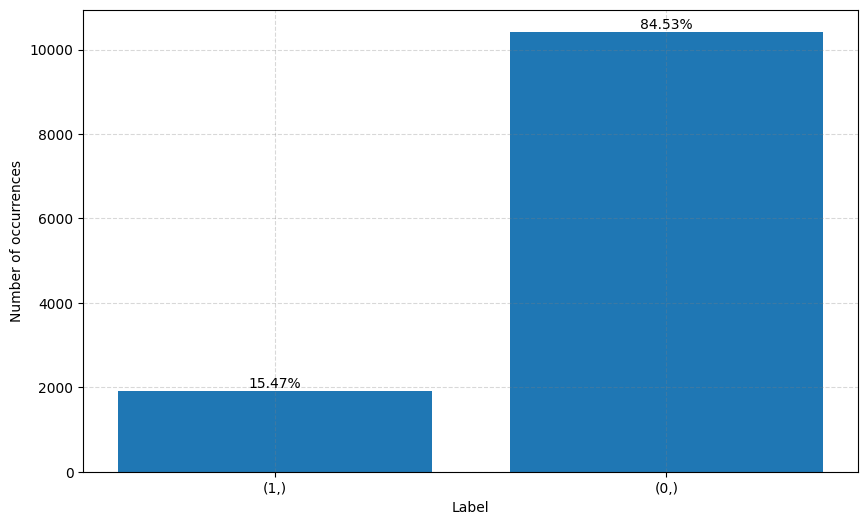

In [12]:
# Distribution of the variable y

# Compute the number of occurrences and the proportion of each label in ascending order
label_counts = y.value_counts().sort_values(ascending=True)
label_proportions = y.value_counts(normalize=True).sort_values(ascending=True)

# Bar position: 0, 1, 2, ...
positions = range(len(label_counts))

plt.figure(figsize=(10, 6))
# Create bar chart
plt.bar(positions, label_counts.values)

# Replace the index by the labels
plt.xticks(positions, label_counts.index)

# Print the percentage on each chart
for i, count in enumerate(label_counts.values):
    proportion = label_proportions.iloc[i]
    plt.text(i, count, f"{proportion:.2%}", ha='center', va='bottom')

# Activate teh grid
plt.grid(True, color='grey', linestyle = '--', alpha = 0.3)

# Axis labeling
plt.xlabel("Label")
plt.ylabel("Number of occurrences")

# Display the chart
plt.show()

We have almost 15.5% of shoppers that complete their purchasing on E-commerce website.
Only a small fraction of sessions result in a purchase, leading to a highly imbalanced classification problem. 

## 4- Distribution of numerical variables (UNIVARIATE)

In [13]:
# Numerical variables

num_columns = ["Administrative", "Administrative_Duration", "Informational", "Informational_Duration", 
               "ProductRelated", "ProductRelated_Duration", "BounceRates", "ExitRates", "PageValues", "SpecialDay"]

***ProductRelated_Duration***

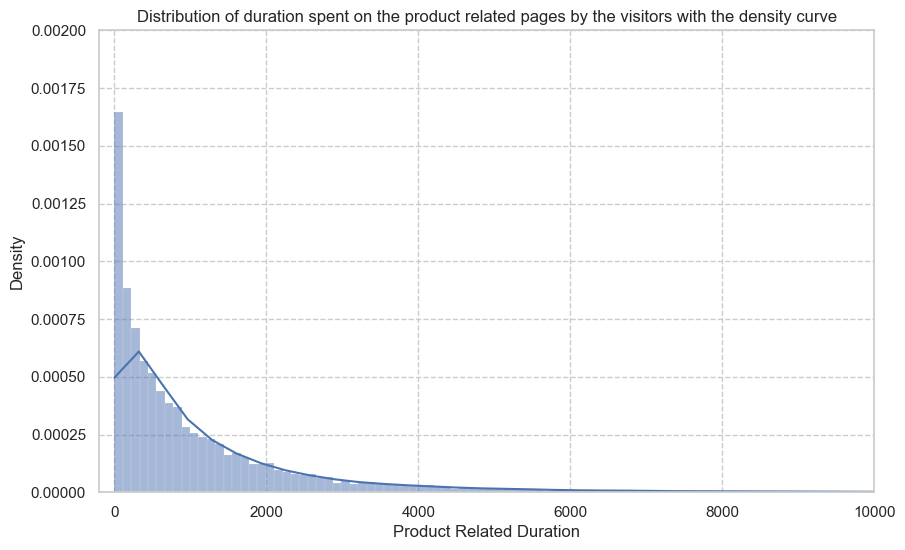

In [14]:
# Histogram and density (KDE - Kernel Density Estimate)
plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid")
sns.histplot(data=X, x='ProductRelated_Duration', kde=True, stat="density")
plt.title("Distribution of duration spent on the product related pages by the visitors with the density curve")
plt.xlabel("Product Related Duration")
plt.ylabel("Density")
plt.ylim(0,0.002)
plt.xlim(-200, 10000)
plt.grid(True, linestyle='--')
plt.show()

The distribution is highly right-skewed, indicating that most visitors spend limited time on product pages.

***PageValues***

La métrique Page Value (ou Valeur de la page) dans Google Analytics est l'un des indicateurs les plus puissants pour comprendre quelles pages de votre site contribuent réellement à gagner de l'argent ou à atteindre vos objectifs.

Contrairement au "Nombre de vues" qui mesure la popularité, la Page Value mesure l'influence financière.

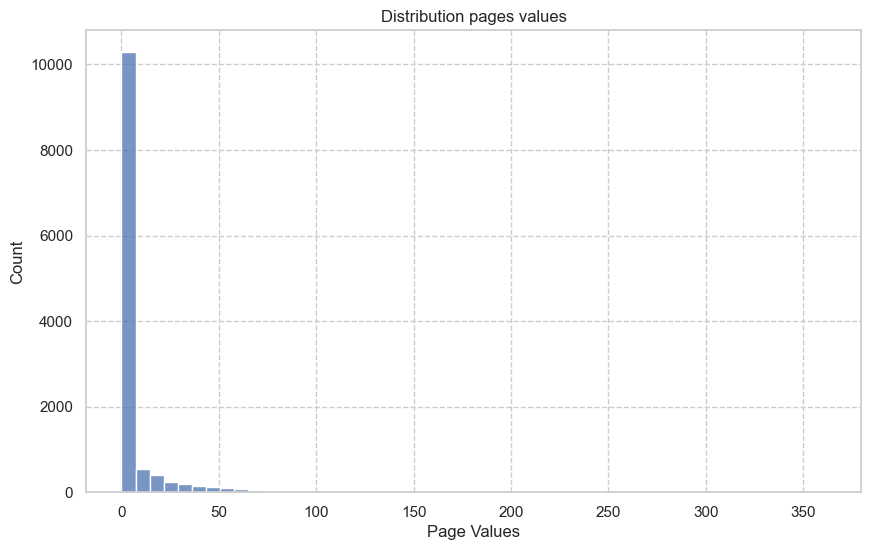

In [15]:
# Histogram
plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid")
sns.histplot(data=X, x='PageValues', bins=50)
plt.title("Distribution pages values")
plt.xlabel("Page Values")
plt.grid(True, linestyle='--')
plt.show()

Page values are zero for most sessions, while a small subset generates substantial conversion value.

***BounceRates***

Le pourcentage des visiteurs qui arrivent sur le site web et quittent sans visiter une autre page.

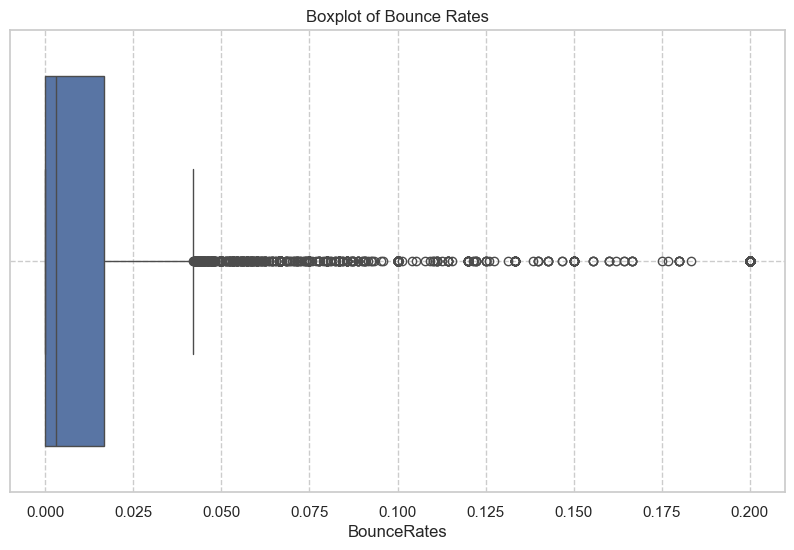

In [16]:
# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=X['BounceRates'])
plt.grid(True, linestyle='--')
plt.title("Boxplot of Bounce Rates")
plt.show()

***Economic interpretation***

- Most visitors do not leave the site immediately

- A small fraction gives up very early

***This suggests:***

- targeting issues
- poor match between landing page and expectations
- low-quality traffic

The distribution has a median close to zero and a large number of high-values outlier. This indicates that while most sessions involve continued navigation, a small fraction of visits result in immediate abandonment, reflecting substantial heterogeneity in user engagement.

## 5- Distribution of categorical variables (UNIVARIATE)

In [17]:
cat_columns = [column for column in X.columns if column not in num_columns]
cat_columns

['Month',
 'OperatingSystems',
 'Browser',
 'Region',
 'TrafficType',
 'VisitorType',
 'Weekend']

In [18]:
X[cat_columns].head()

,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,Feb,1,1,1,1,Returning_Visitor,False
1,Feb,2,2,1,2,Returning_Visitor,False
2,Feb,4,1,9,3,Returning_Visitor,False
3,Feb,3,2,2,4,Returning_Visitor,False
4,Feb,3,3,1,4,Returning_Visitor,True


In [19]:
X['VisitorType'].unique()

array(['Returning_Visitor', 'New_Visitor', 'Other'], dtype=object)

***VisitorType***

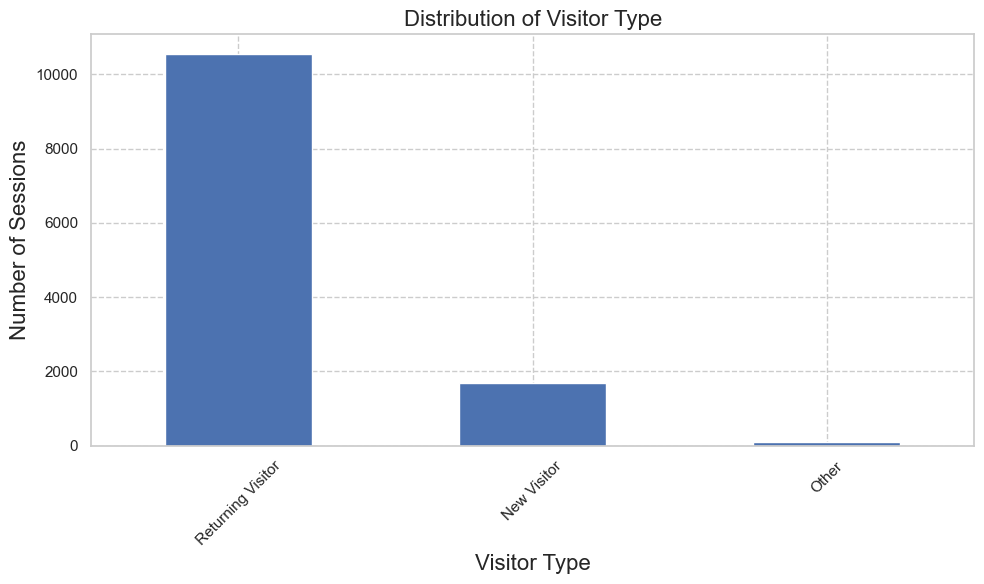

In [36]:
plt.figure(figsize=(10, 6))
counts = X['VisitorType'].value_counts()
counts.plot(kind='bar')

plt.title('Distribution of Visitor Type', fontsize = 16)
plt.xlabel('Visitor Type', fontsize = 16)
plt.ylabel('Number of Sessions',fontsize = 16)


plt.xticks(range(len(counts)), ['Returning Visitor', 'New Visitor', 'Other'], rotation=45)

plt.grid(True, linestyle='--')
plt.tight_layout()
plt.show()

***Economic Interpretation***

This distribution suggests that the site largely relies on a base of loyal users, which is typical of well-established e-commerce platforms. The high proportion of returning visitors indicates that consumers frequently come back to the site, which can be interpreted as a sign of trust and familiarity with the offered products.

However, the noticeable presence of new visitors also highlights the importance of traffic acquisition mechanisms and points to a conversion potential that should be explored in more detail in the bivariate analysis.

The distribution of visitor types reveals that most sessions are generated by returning visitors, while new visitors account for a smaller share of website traffic. This pattern suggests a strong degree of user loyalty and familiarity with the platform, which may play a crucial role in the purchasing decision. The marginal presence of other visitor categories indicates that the dataset is largely structured around a clear distinction between new and returning users.

***Month***

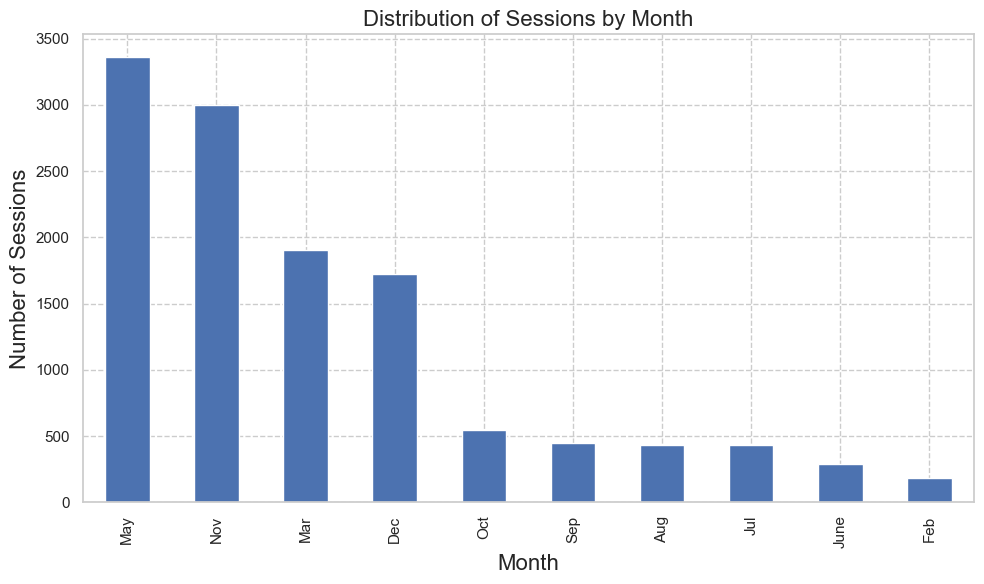

In [21]:
plt.figure(figsize=(10, 6))
X['Month'].value_counts().plot(kind='bar')
plt.title('Distribution of Sessions by Month', fontsize = 16)
plt.xlabel('Month', fontsize = 16)
plt.ylabel('Number of Sessions', fontsize = 16)
plt.grid(True, linestyle='--')
plt.tight_layout()
plt.show()


***Economic Interpretation***

This distribution suggests the presence of marked seasonality in e-commerce site traffic. The observed peaks may be linked to periods of high commercial activity, specific marketing campaigns, or seasonal consumer behavior. Conversely, months with lower traffic may correspond to slow periods in terms of demand or consumer interest.

This observation is consistent with the dynamics of e-commerce, where browsing intensity varies significantly throughout the year. It supports including the Month variable as a contextual factor in bivariate analysis and predictive modeling to control for seasonal effects on the likelihood of purchase.

The distribution of sessions across months reveals strong seasonality in website traffic. A limited number of months accounts for a large share of visits, while others exhibit substantially lower activity. This pattern suggests that browsing behavior and website exposure vary over the year, which may influence purchase opportunities and conversion dynamics.

***Weekend***

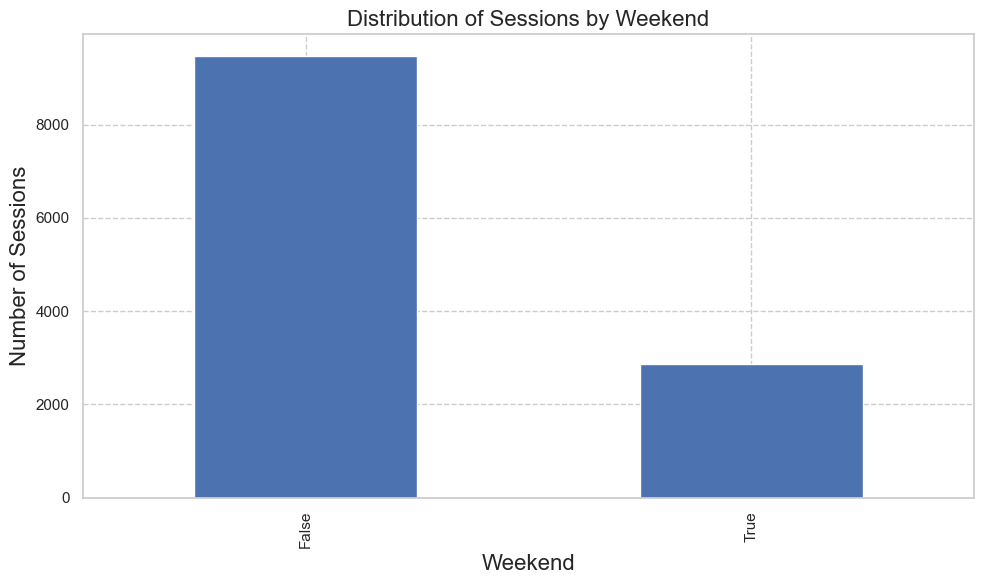

In [22]:
plt.figure(figsize=(10, 6))
X['Weekend'].value_counts().plot(kind='bar')
plt.title('Distribution of Sessions by Weekend', fontsize = 16)
plt.xlabel('Weekend', fontsize = 16)
plt.ylabel('Number of Sessions', fontsize = 16)
plt.grid(True, linestyle='--')
plt.tight_layout()
plt.show()

***Economic Interpretation***

This distribution suggests that browsing the e-commerce site is more integrated into users’ daily activities, likely related to information-seeking or purchasing behaviors that occur during weekdays. Weekend visits, although less frequent, may nevertheless correspond to more relaxed sessions or more deliberate purchasing decisions, a hypothesis that will be examined in the bivariate analysis.

This finding justifies including the Weekend variable in the subsequent analysis to assess whether the timing of the visit influences the likelihood of conversion.

The distribution of sessions by day type indicates that most website visits occur on weekdays rather than weekends. This pattern suggests that online browsing is primarily embedded in routine daily activities, while weekend visits, although less frequent, may reflect different browsing intentions.

## 6- Comparison of buyers vs. non-buyers (BIVARIATE)

In [23]:
# Create unique dataset for EDA
df_eda = X.copy()
df_eda['Revenue'] = y.values

In [24]:
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

On utilise un boxplot plutôt qu’un barplot pour les variables numériques parce qu’un boxplot montre la distribution complète, tandis qu’un barplot ne montre qu’une moyenne.

***ProductRelated_Duration × Revenue***

<Figure size 1000x1000 with 0 Axes>

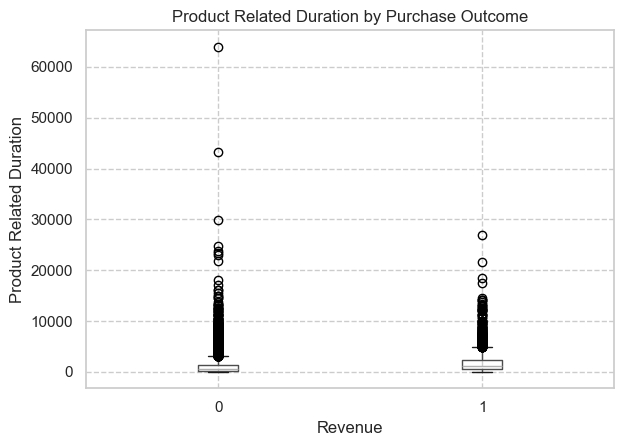

In [25]:
plt.figure(figsize=(10, 10))
df_eda.boxplot(column='ProductRelated_Duration', by='Revenue')
plt.title('Product Related Duration by Purchase Outcome')
plt.suptitle('')
plt.xlabel('Revenue')
plt.ylabel('Product Related Duration')
plt.grid(True, linestyle='--')
plt.tight_layout()
plt.show()

***Economic Interpretation***

This chart highlights that the likelihood of purchase is closely linked to the intensity of product page exploration. Visitors who complete a purchase spend, on average and median, more time viewing products, suggesting a more thorough search process and higher expected utility.

The presence of significant outliers in both groups indicates that a small number of visitors exhibit extremely intensive browsing behavior. Nevertheless, even accounting for this heterogeneity, the difference in central tendency between buyers and non-buyers remains pronounced, confirming the central role of product engagement in the purchasing decision.

The comparison of product-related browsing time across purchase outcomes reveals substantial differences between buyers and non-buyers. Sessions resulting in a purchase exhibit significantly higher median and interquartile ranges of product-related duration. Although both distributions are highly right-skewed and characterized by numerous outliers, the systematic shift toward higher engagement among purchasing sessions highlights the importance of intensive product exploration in the online purchasing decision.

***PageValues × Revenue***

<Figure size 1000x1000 with 0 Axes>

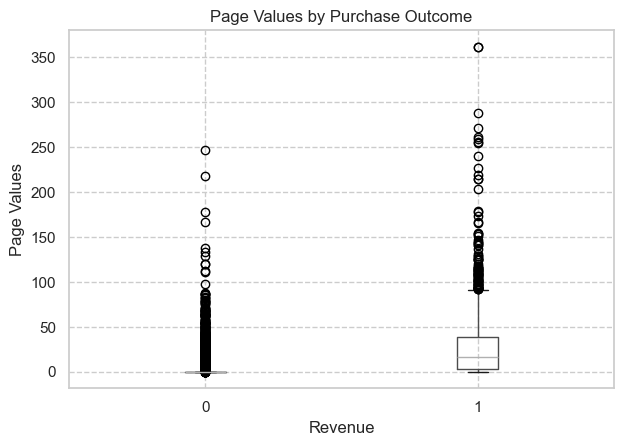

In [26]:
plt.figure(figsize=(10, 10))
df_eda.boxplot(column='PageValues', by='Revenue')
plt.title('Page Values by Purchase Outcome')
plt.suptitle('')
plt.xlabel('Revenue')
plt.ylabel('Page Values')
plt.grid(True, linestyle='--')
plt.tight_layout()
plt.show()

***Economic Interpretation***

This chart shows that PageValues is an almost direct indicator of purchase intent. Sessions that result in a transaction are associated with pages that have historically contributed to conversions, reflecting a user journey oriented towards high-commercial-value content.

The very clear difference between the two distributions suggests that PageValues effectively captures the quality of the browsing journey from a conversion perspective. This variable thus appears to be one of the major determinants of purchase probability, which explains its expected importance in predictive models.

The distribution of page values differs sharply across purchase outcomes. Non-purchasing sessions exhibit page values close to zero, whereas purchasing sessions are associated with substantially higher medians and dispersion. This indicates that sessions leading to a transaction tend to concentrate on pages with strong historical conversion value, making PageValues a key predictor of online purchasing behavior.

***BounceRates × Revenue***

<Figure size 1000x1000 with 0 Axes>

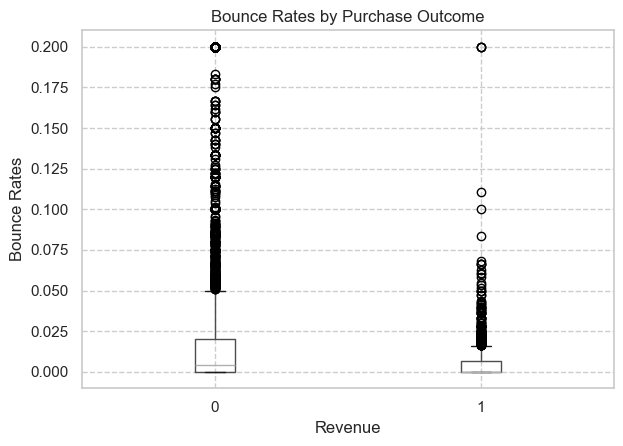

In [27]:
plt.figure(figsize=(10, 10))
df_eda.boxplot(column='BounceRates', by='Revenue')
plt.title('Bounce Rates by Purchase Outcome')
plt.suptitle('')
plt.xlabel('Revenue')
plt.ylabel('Bounce Rates')
plt.grid(True, linestyle='--')
plt.tight_layout()
plt.show()

***Economic Interpretation***

This chart indicates that sessions that result in a purchase are associated with low initial disengagement, while sessions without a purchase more frequently exhibit quick exit behaviors. A high bounce rate generally reflects a mismatch between the visitor's expectations and the content of the landing page, or lower-quality traffic.

Thus, the bounce rate appears as a significant negative factor in the online purchasing decision. Visitors who leave the site quickly are much less likely to complete a transaction, highlighting the crucial role of first impressions and the relevance of landing pages.

Bounce rates differ substantially across purchase outcomes. Non-purchasing sessions exhibit higher median bounce rates and greater dispersion, while purchasing sessions are characterized by very low bounce behavior. This pattern suggests that early disengagement strongly reduces the likelihood of completing an online purchase.

***We will move on categorical variable, so we use a barplot*** 

***VisitorType × Revenue***

<Figure size 1000x1000 with 0 Axes>

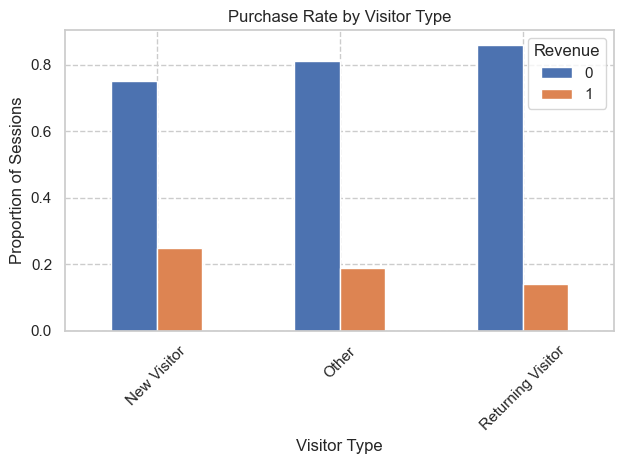

In [34]:
plt.figure(figsize=(10, 10))
counts = df_eda['VisitorType'].value_counts()
pd.crosstab(df_eda['VisitorType'], df_eda['Revenue'], normalize='index').plot(kind='bar')
plt.title('Purchase Rate by Visitor Type')
plt.xlabel('Visitor Type')
plt.ylabel('Proportion of Sessions')
plt.xticks(range(len(counts)), ['New Visitor', 'Other', 'Returning Visitor'], rotation=45)
plt.grid(True, linestyle='--')
plt.tight_layout()
plt.show()

***Economic Interpretation***

This result suggests that the visitor's profile significantly influences the likelihood of making a purchase. New visitors may be motivated by an immediate purchase intention, for example following a targeted search or a marketing campaign. Conversely, returning visitors, although more numerous, may engage in more exploratory or informative browsing behavior, resulting in a lower proportion of purchases per session.

This observation highlights the importance of distinguishing between traffic volume and conversion rate and justifies including the type of visitor as an explanatory variable in predictive models.

Purchase rates differ across visitor types. New visitors exhibit a higher proportion of purchasing sessions compared to returning visitors, although returning visitors account for the majority of website traffic. This pattern highlights the distinction between traffic volume and conversion probability and suggests that visitor type plays a role in shaping purchasing behavior.

***Weekend × Revenue***

<Figure size 1000x1000 with 0 Axes>

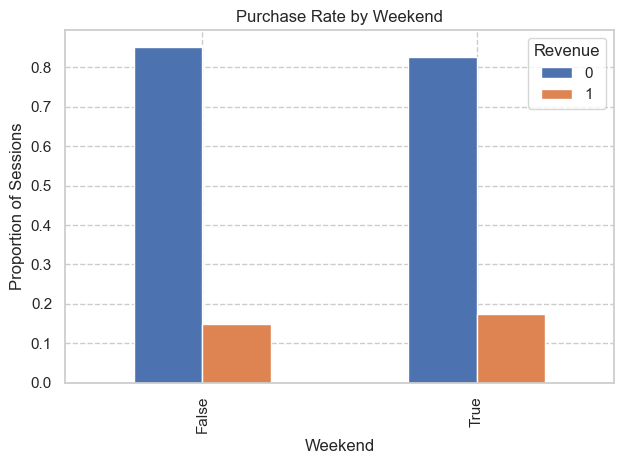

In [37]:
plt.figure(figsize=(10, 10))
pd.crosstab(df_eda['Weekend'], df_eda['Revenue'], normalize='index').plot(kind='bar')
plt.title('Purchase Rate by Weekend')
plt.xlabel('Weekend')
plt.ylabel('Proportion of Sessions')
plt.grid(True, linestyle='--')
plt.tight_layout()
plt.show()

***Economic Interpretation***

This result suggests that the timing of the visit influences purchasing behavior. Weekend visits may correspond to longer or more deliberate sessions, during which users have more time to explore products and make a purchasing decision.

However, the observed difference remains moderate, indicating that the timing of the visit is an additional factor rather than a primary determinant of the purchasing decision. A multivariate analysis will help determine whether this effect persists once browsing behaviors are taken into account.

Purchase rates are slightly higher during weekend visits compared to weekdays. Although most sessions do not result in a transaction regardless of timing, weekend visits appear to be associated with a modest increase in purchase likelihood, suggesting that temporal context may influence online buying behavior.

***Month × Revenue***

<Figure size 1000x1000 with 0 Axes>

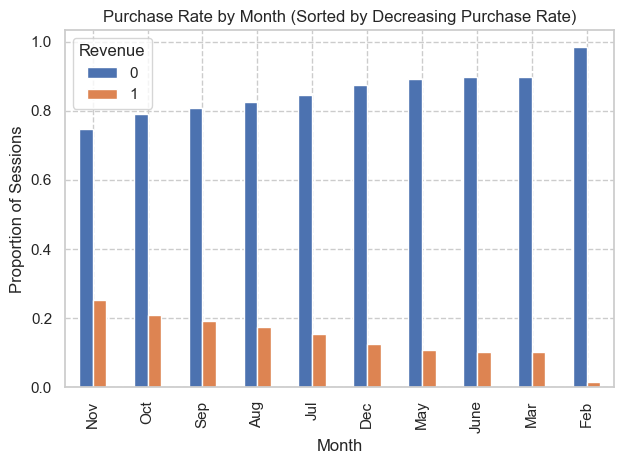

In [39]:
# 1. Table de contingence normalisée

ct = pd.crosstab(df_eda['Month'], df_eda['Revenue'], normalize='index')

# 2. Sort the months by decreasing purchase rate (Revenue = 1)
ct_sorted = ct.sort_values(by=1, ascending=False)

# 3. Bar plot
plt.figure(figsize=(10, 10))
ct_sorted.plot(kind='bar')

plt.title('Purchase Rate by Month (Sorted by Decreasing Purchase Rate)')
plt.xlabel('Month')
plt.ylabel('Proportion of Sessions')
plt.grid(True, linestyle='--')
plt.tight_layout()
plt.show()

***Economic Interpretation***

This result suggests that seasonality affects not only traffic volume but also the likelihood of visitors completing a purchase. Months characterized by high purchase rates may correspond to periods of promotions, marketing campaigns, or stronger consumer purchase intent. Conversely, months with low conversion rates reflect periods when browsing is more exploratory or informational.

Ranking by purchase rate thus allows for the identification of periods most favorable for conversion, which is directly relevant for marketing strategies and optimizing user journeys.

When months are ordered by decreasing purchase rate, substantial differences in conversion likelihood emerge across the year. A limited number of months exhibit significantly higher proportions of purchasing sessions, while others display markedly lower conversion rates. This pattern highlights the presence of seasonal effects not only in traffic intensity but also in consumers’ propensity to buy.